In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
from google.colab import files
uploaded=files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [9]:
import io
sp = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))
#checking the dimension of the input file
sp.shape

(1000, 8)

In [10]:
sp.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
sp.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
sp.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
#renaming column names for easy accessing of data
new_col={'race/ethnicity':'RaceEthnicity','parental level of education':'ParentalEducation','math score':'MathScore','reading score':'ReadingScore','writing score':'WritingScore','test preparation course':'TestPrep'}
sp.rename(columns=new_col, inplace=True)
sp.columns

Index(['gender', 'RaceEthnicity', 'ParentalEducation', 'lunch', 'TestPrep',
       'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [15]:
#counting the unique values in each column and plotting a graph
sp['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

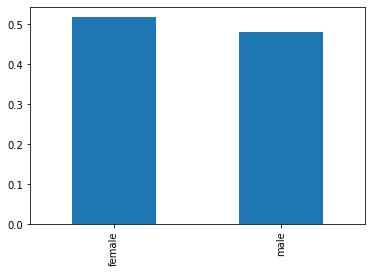

In [16]:
sp.gender.value_counts(normalize=True).plot(kind='bar')

In [17]:
sp['RaceEthnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: RaceEthnicity, dtype: int64

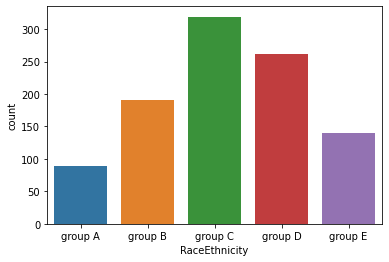

In [18]:
sns.countplot(x='RaceEthnicity',data=sp,order=['group A','group B','group C','group D','group E'])

In [19]:
sp['ParentalEducation'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: ParentalEducation, dtype: int64

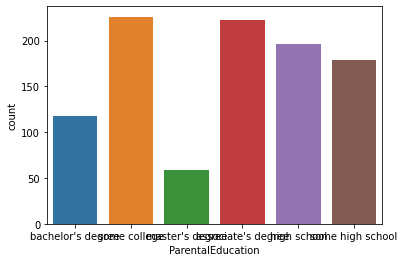

In [20]:
sns.countplot(x='ParentalEducation',data=sp)

In [21]:
sp['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

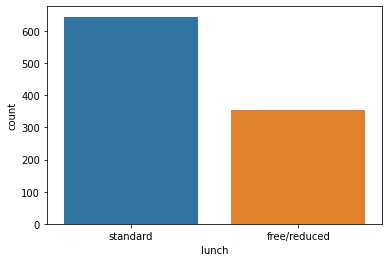

In [22]:
sns.countplot(x='lunch',data=sp)

In [23]:
sp['TestPrep'].value_counts()

none         642
completed    358
Name: TestPrep, dtype: int64

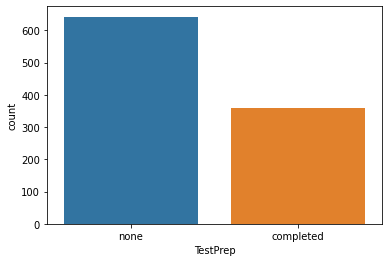

In [24]:
sns.countplot(x='TestPrep',data=sp)

In [25]:
sp['MathScore'].value_counts()

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: MathScore, Length: 81, dtype: int64

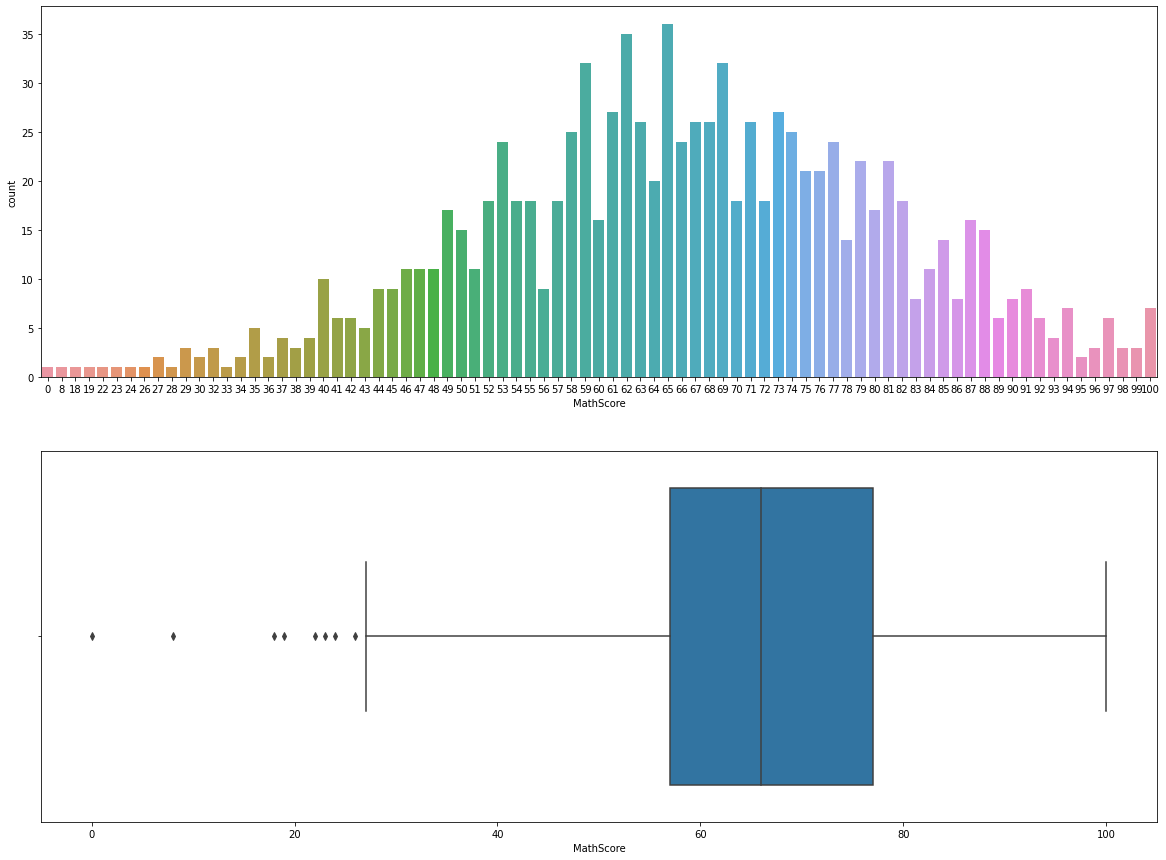

In [53]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(20,15))
sns.countplot(x='MathScore',data=sp,ax=axis1)
sns.boxplot(x='MathScore',data=sp,ax=axis2)

average scorers are between 58 to 70

In [0]:
sp['ReadingScore'].value_counts()

72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: ReadingScore, Length: 72, dtype: int64

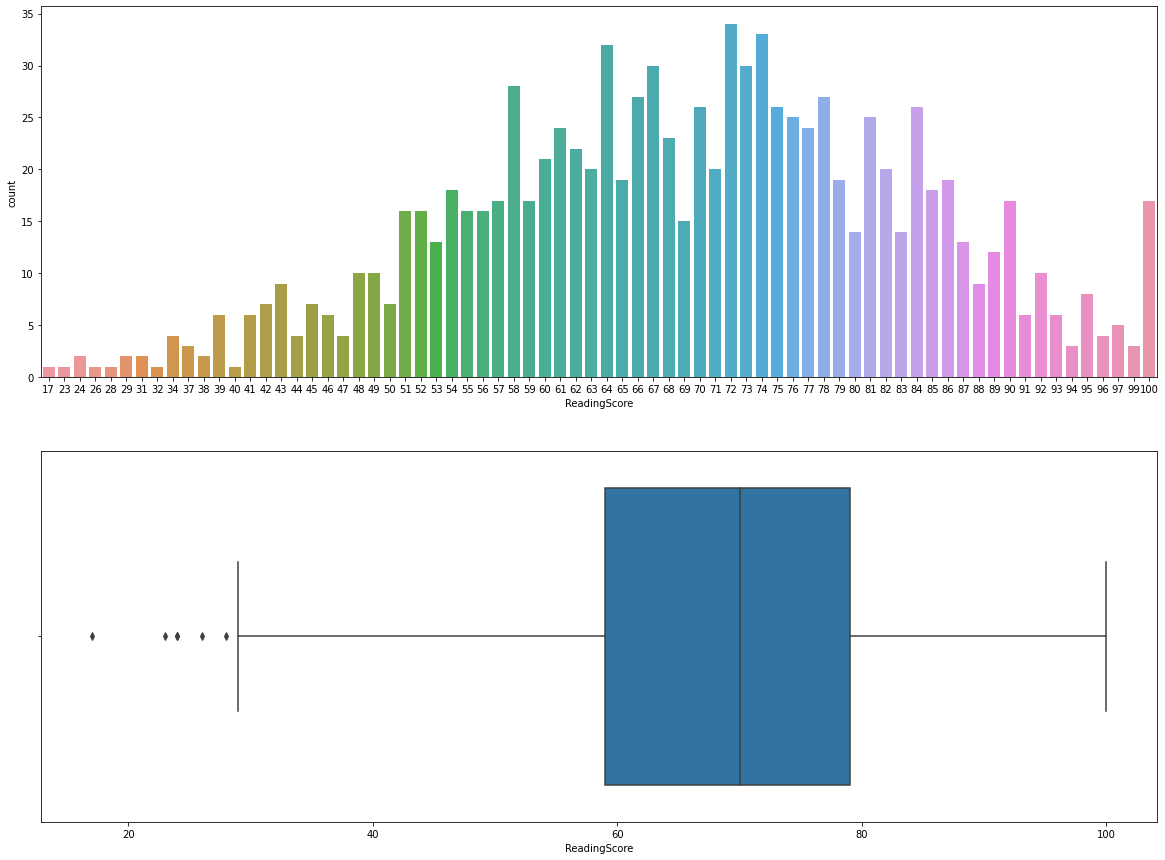

In [54]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(20,15))
sns.countplot(x='ReadingScore',data=sp,ax=axis1)
sns.boxplot(x='ReadingScore',data=sp,ax=axis2)

average scorers are between 57 to 80

In [0]:
sp['WritingScore'].value_counts()

74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19     1
15     1
10     1
Name: WritingScore, Length: 77, dtype: int64

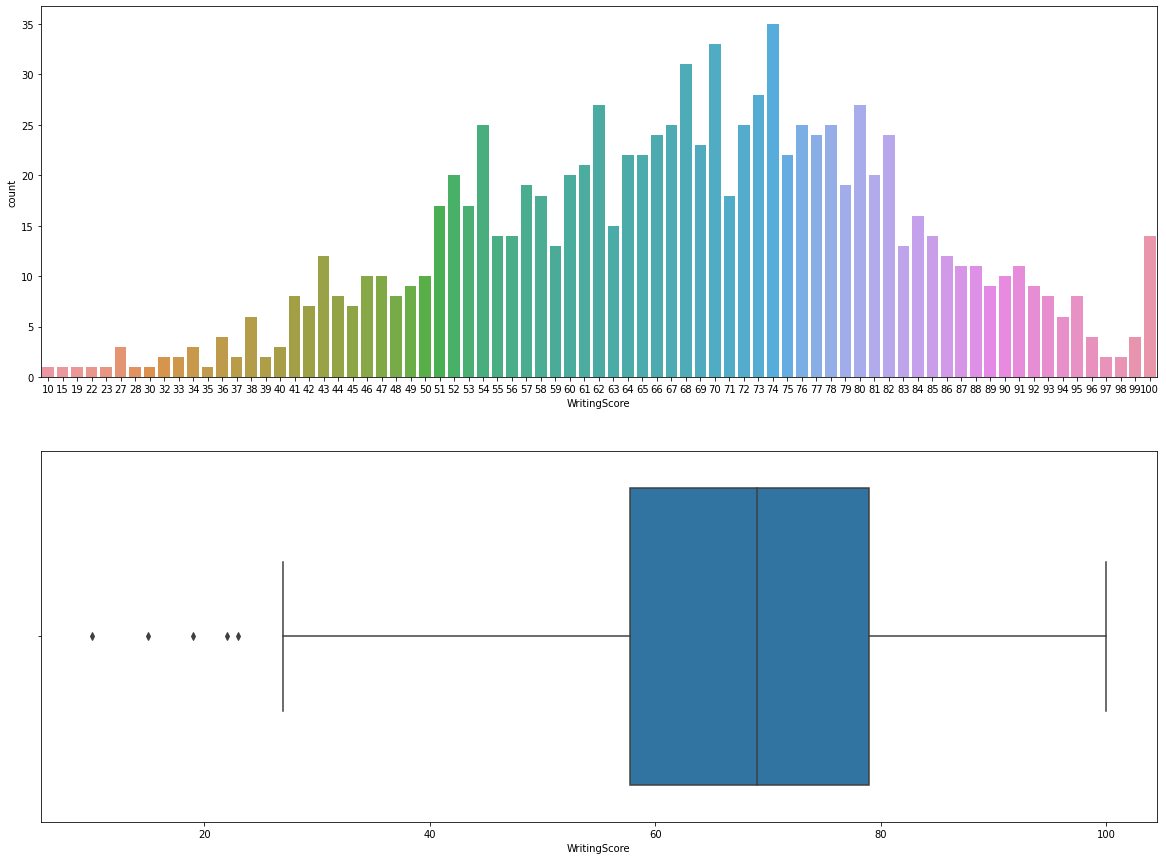

In [55]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(20,15))
sns.countplot(x='WritingScore',data=sp,ax=axis1)
sns.boxplot(x='WritingScore',data=sp,ax=axis2)

average scorers are bwetween 60 to 80

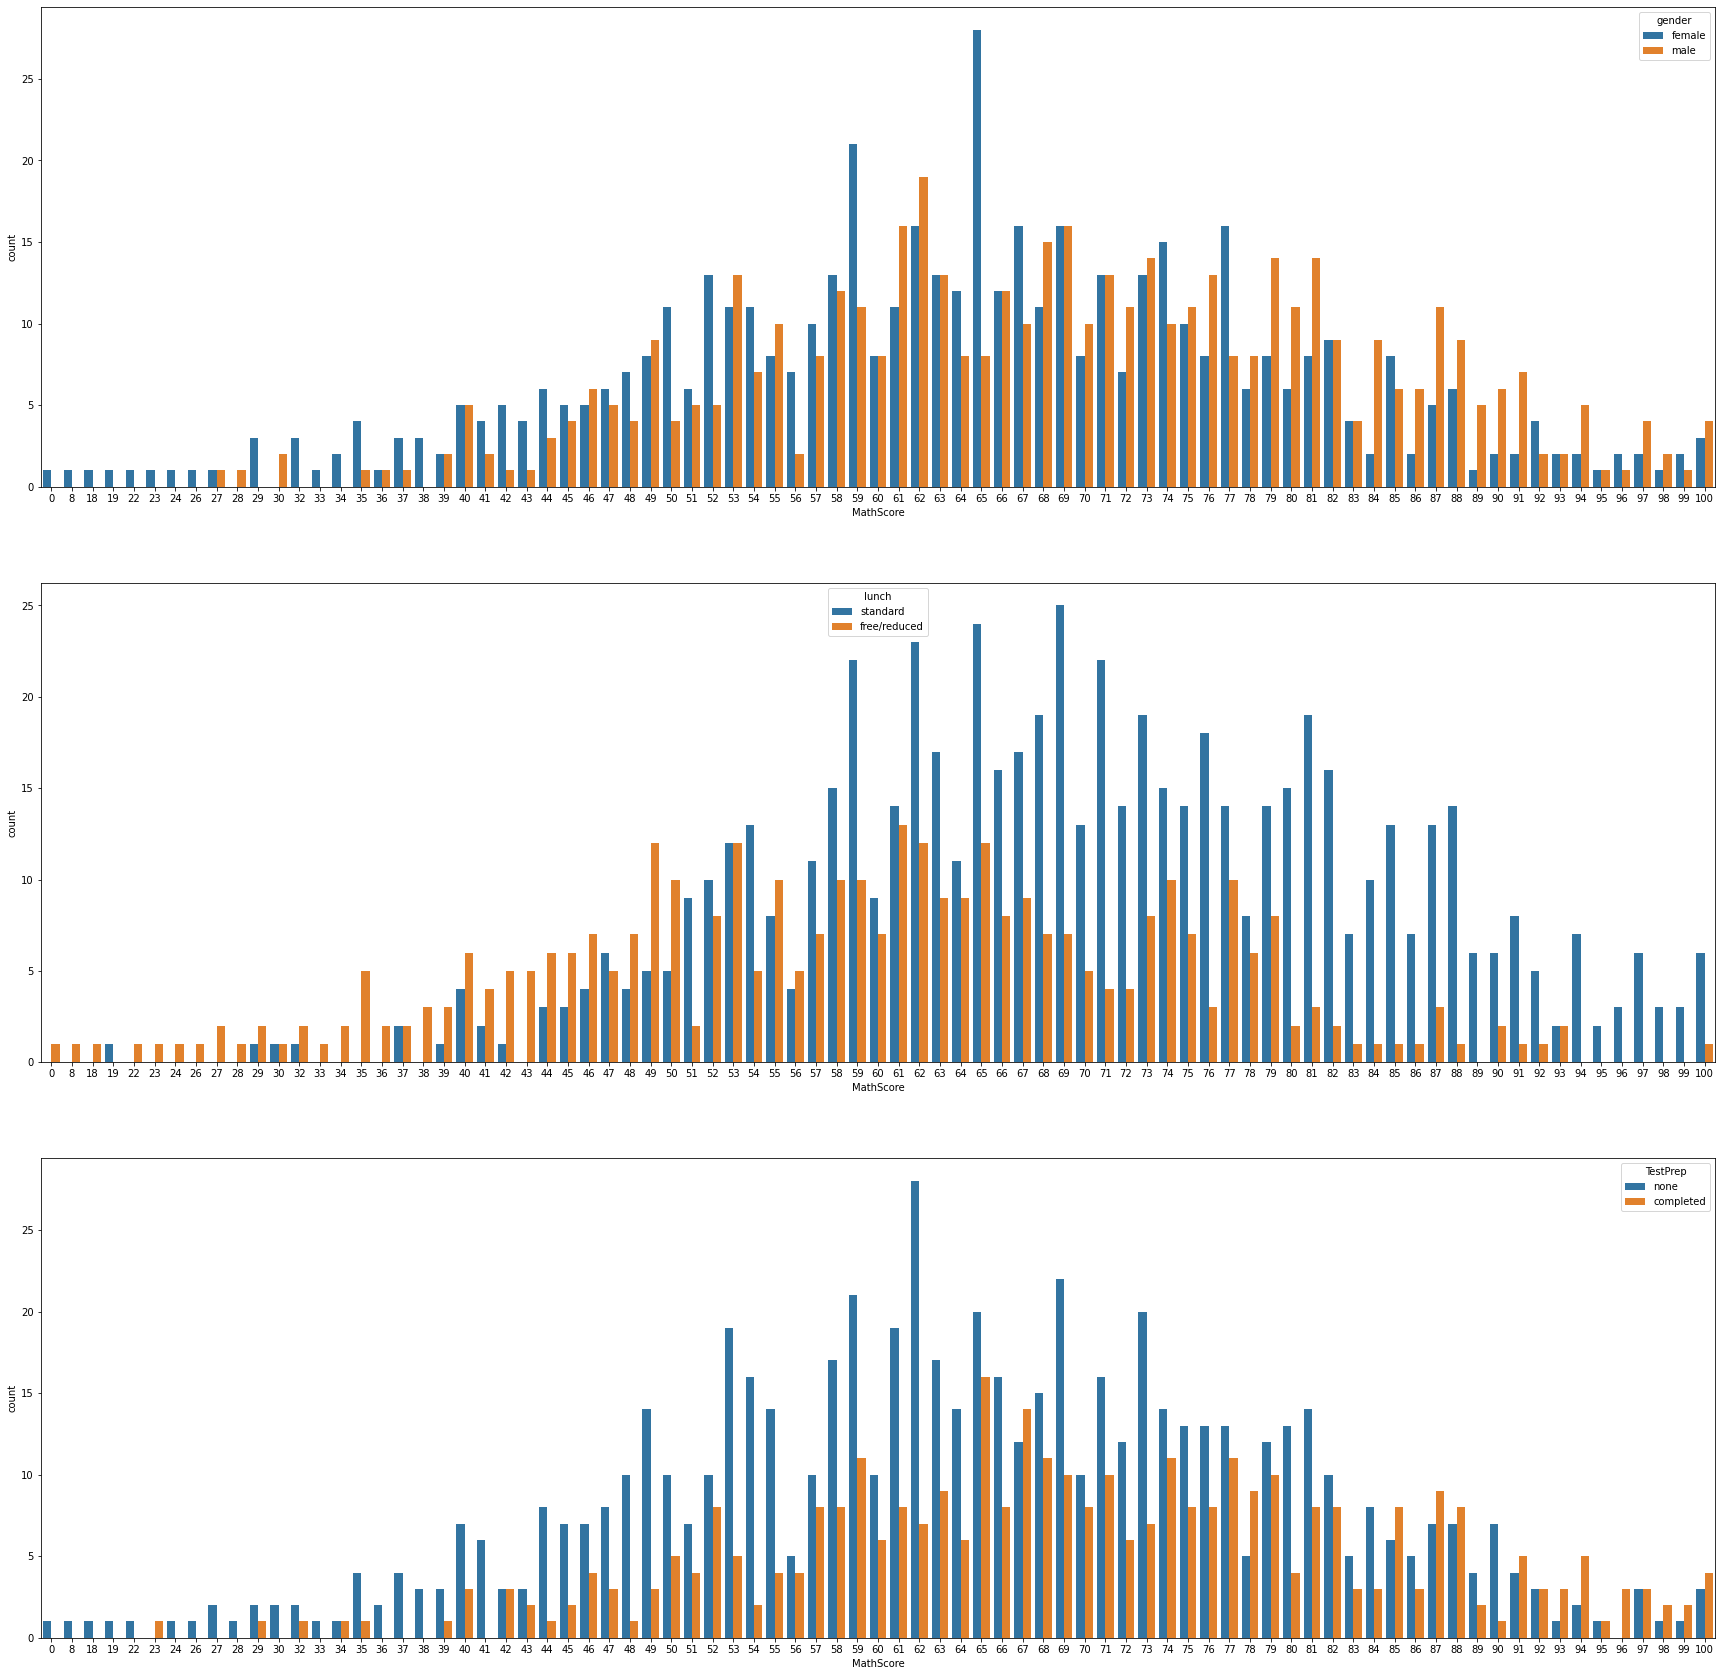

In [57]:
#trying to find relation between primary columns and MathScore
fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(30,30))
sns.countplot(x='MathScore',hue='gender', data=sp,ax=axis1)
sns.countplot(x='MathScore',hue='lunch', data=sp,ax=axis2)
sns.countplot(x='MathScore',hue='TestPrep', data=sp,ax=axis3)

1. both male and female students performed. No conclusion can be drawn
2. students who ate more performed better
3. students who did not take test preparation course have secured average score

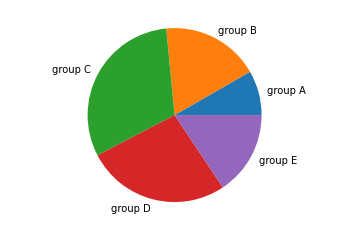

In [0]:
sums = sp.groupby(sp['RaceEthnicity'])['MathScore'].sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index);
plt.show()

Group C was better performer

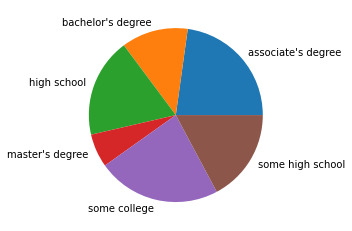

In [0]:
sums = sp.groupby(sp['ParentalEducation'])['MathScore'].sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index);
plt.show()

Stundents whose parent's education level is Asssociate degree performed better

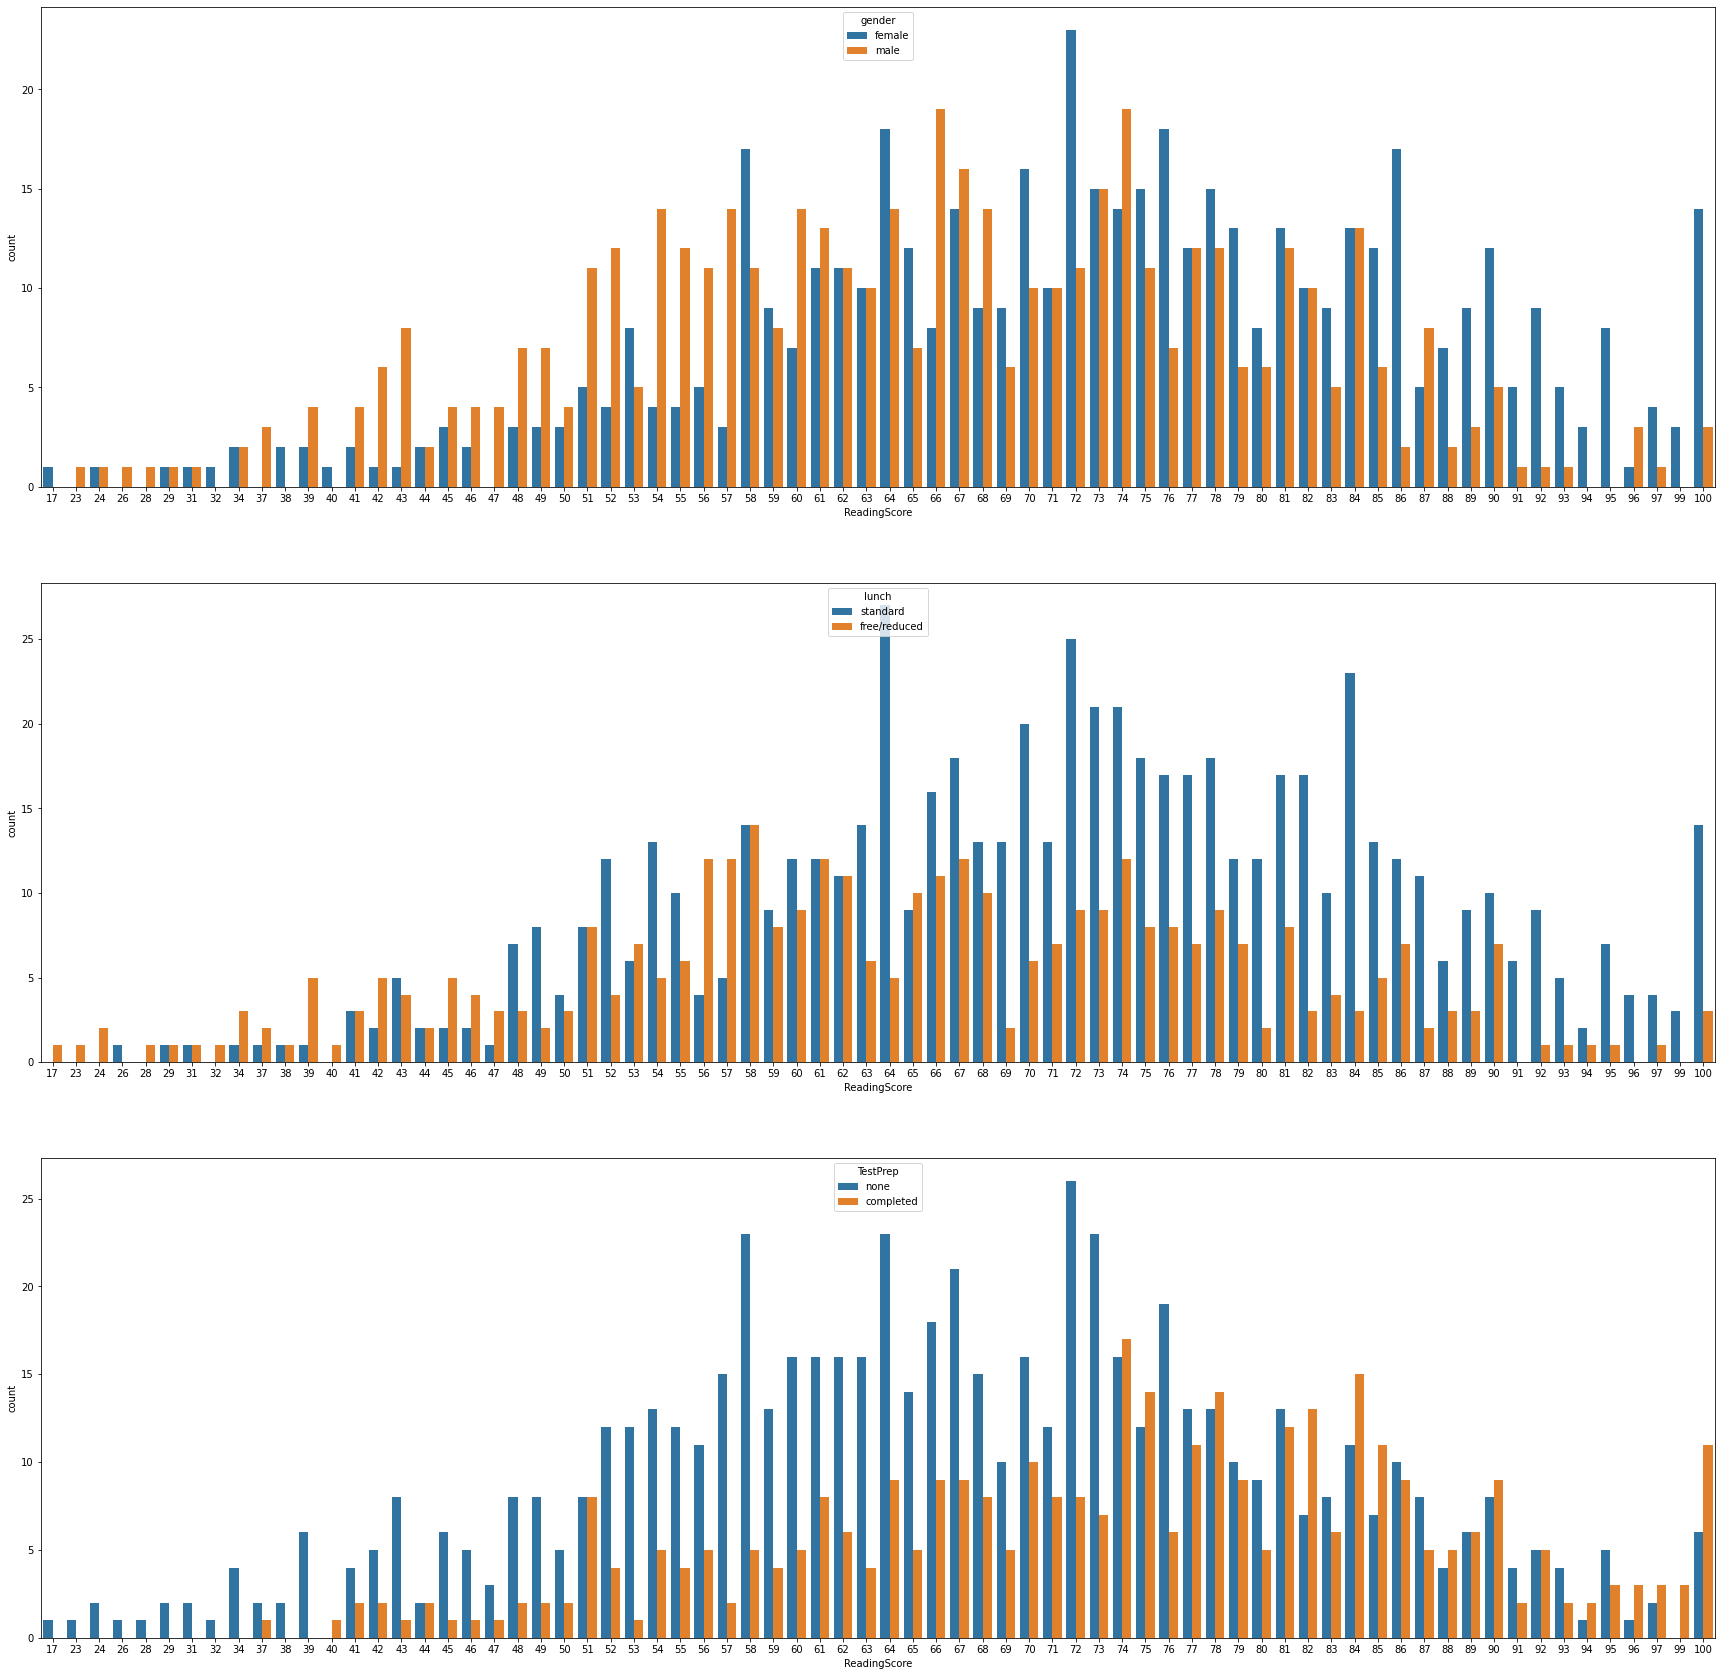

In [0]:
#trying to find relation between primary columns and ReadingScore
fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(30,30))
sns.countplot(x='ReadingScore',hue='gender', data=sp,ax=axis1)
sns.countplot(x='ReadingScore',hue='lunch', data=sp,ax=axis2)
sns.countplot(x='ReadingScore',hue='TestPrep', data=sp,ax=axis3)

1. female students performed better
2. students who ate more performed better
3. students who did not take test preparation course have secured average score

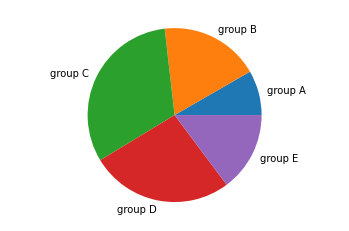

In [0]:
sums = sp.groupby(sp['RaceEthnicity'])['ReadingScore'].sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index);
plt.show()

Group C was better performer

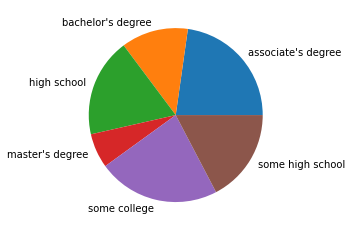

In [0]:
sums = sp.groupby(sp['ParentalEducation'])['ReadingScore'].sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index);
plt.show()

Students whose parents education background is Associate's degree performed better

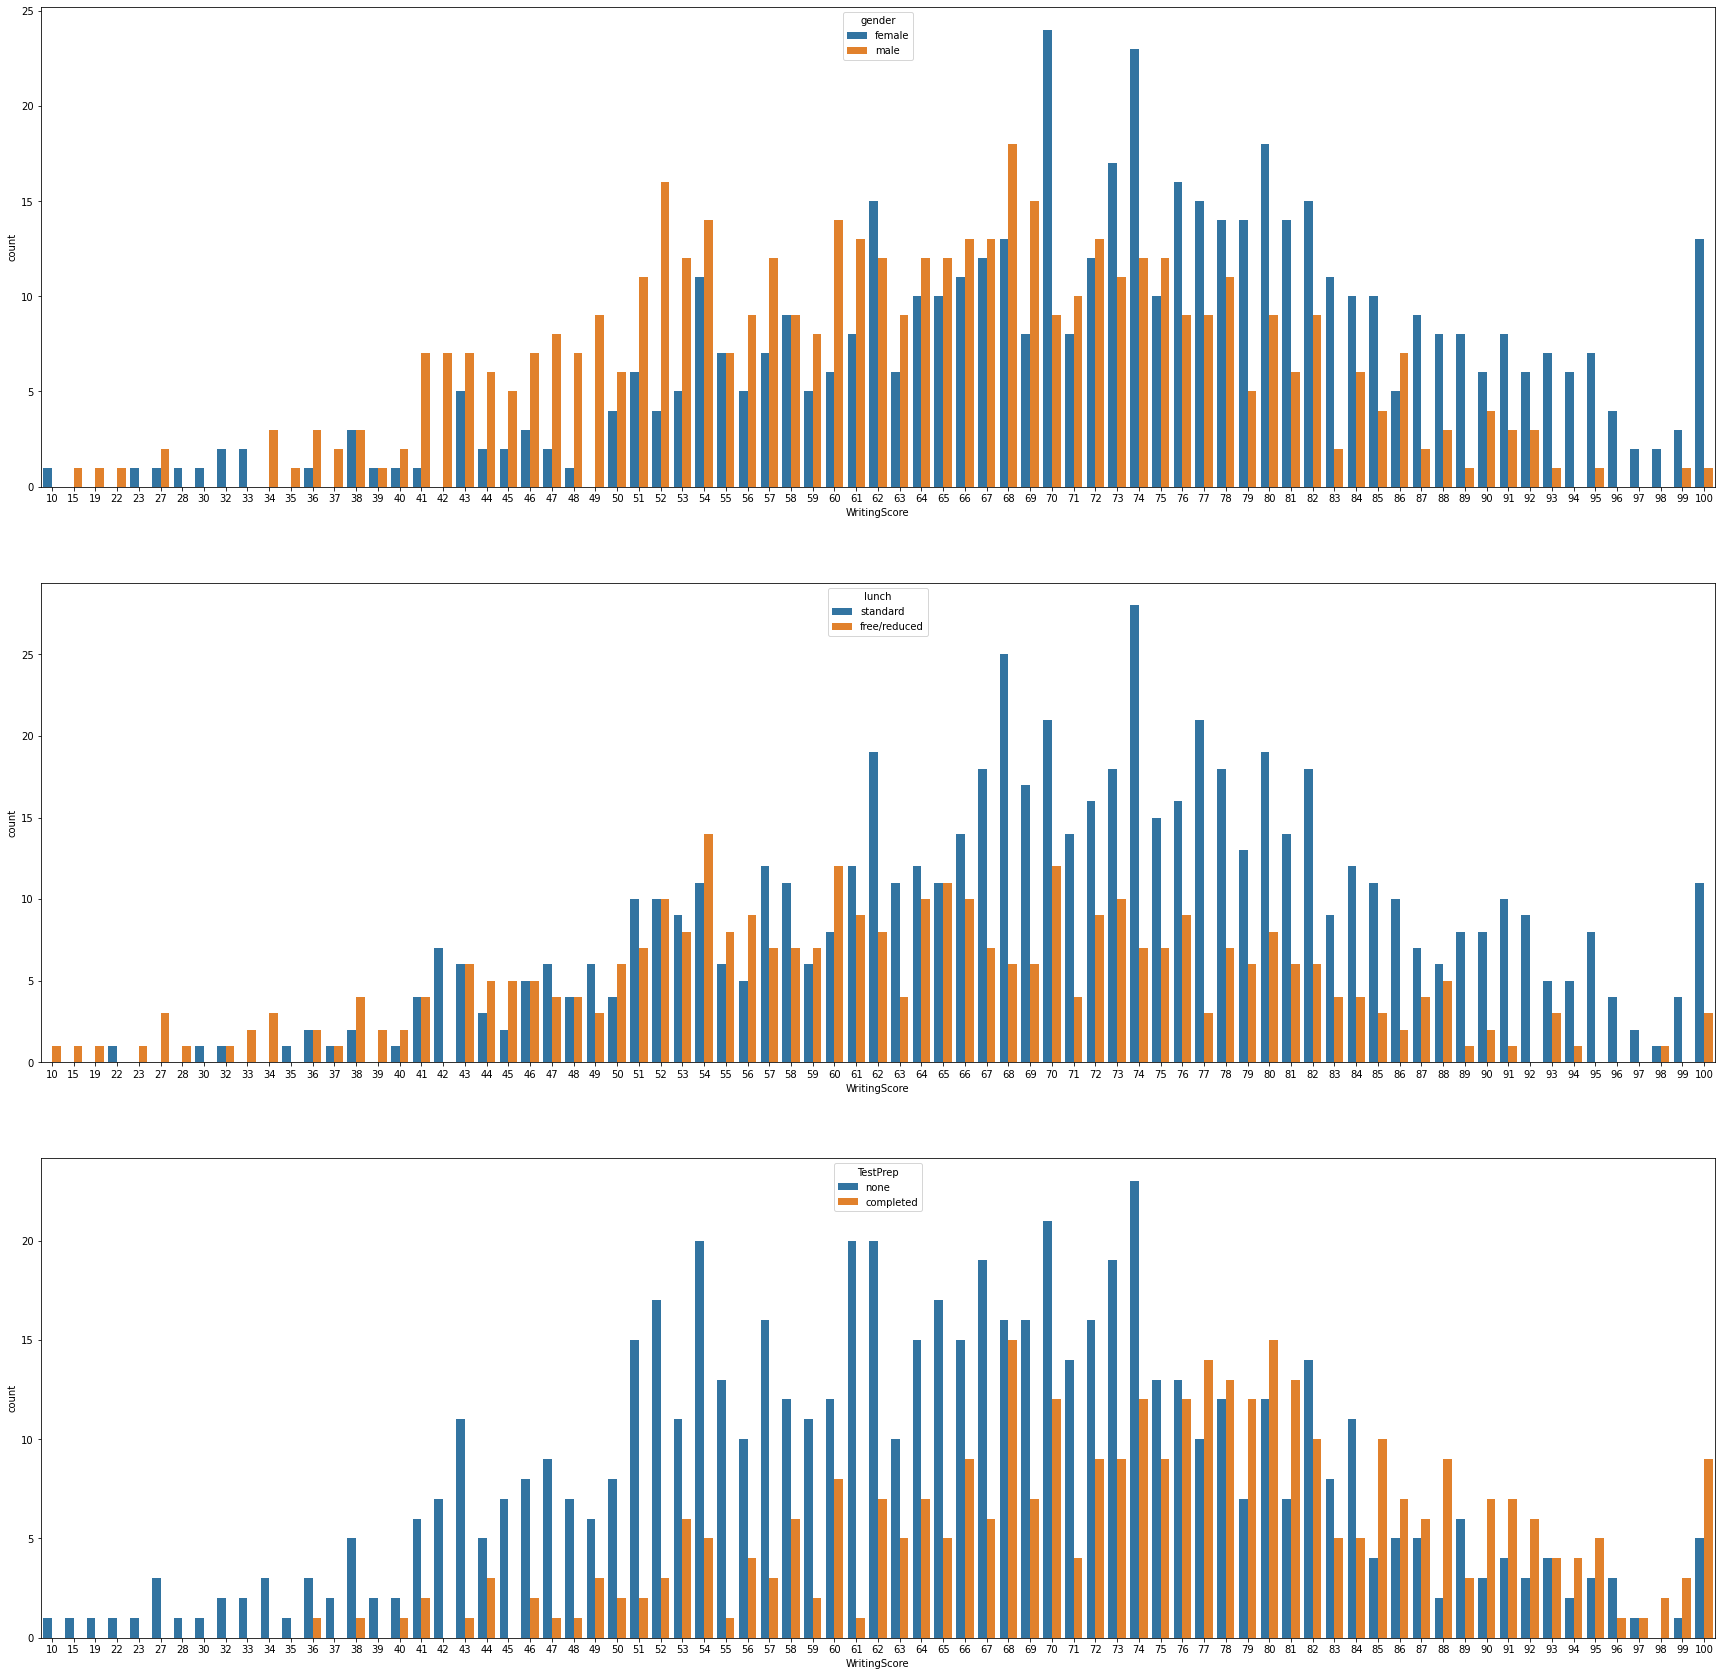

In [0]:
#trying to find relation between primary columns and WritingScore
fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(30,30))
sns.countplot(x='WritingScore',hue='gender', data=sp,ax=axis1)
sns.countplot(x='WritingScore',hue='lunch', data=sp,ax=axis2)
sns.countplot(x='WritingScore',hue='TestPrep', data=sp,ax=axis3)

1. Female students Performed Better
2. students who ate more performed better
3. students who did not take test preparation course have secured average score

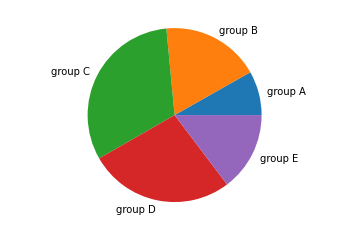

In [0]:
sums = sp.groupby(sp['RaceEthnicity'])['WritingScore'].sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index);
plt.show()

Group C was better performer

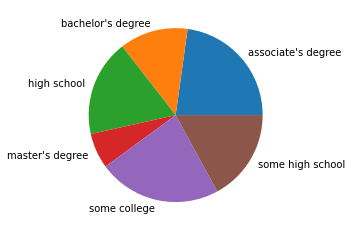

In [0]:
sums = sp.groupby(sp['ParentalEducation'])['WritingScore'].sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index);
plt.show()

Students whose parents education background is Associate's degree performed better

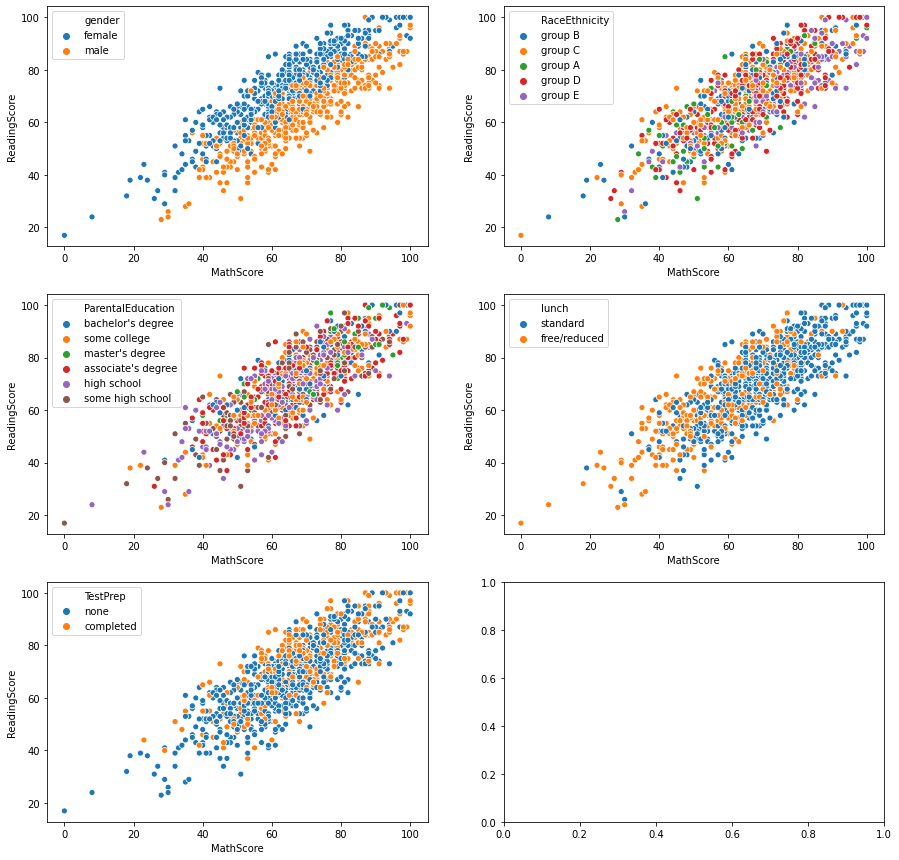

In [0]:
#Comparing MathScore and ReadingScore on the basis of different paramerters
fig, axarr  = plt.subplots(3,2,figsize=(15,15))
sns.scatterplot(x='MathScore',y='ReadingScore', hue='gender',data=sp,ax=axarr[0,0])
sns.scatterplot(x='MathScore',y='ReadingScore', hue='RaceEthnicity',data=sp,ax=axarr[0,1])
sns.scatterplot(x='MathScore',y='ReadingScore', hue='ParentalEducation',data=sp,ax=axarr[1,0])
sns.scatterplot(x='MathScore',y='ReadingScore', hue='lunch',data=sp,ax=axarr[1,1])
sns.scatterplot(x='MathScore',y='ReadingScore', hue='TestPrep',data=sp,ax=axarr[2,0])

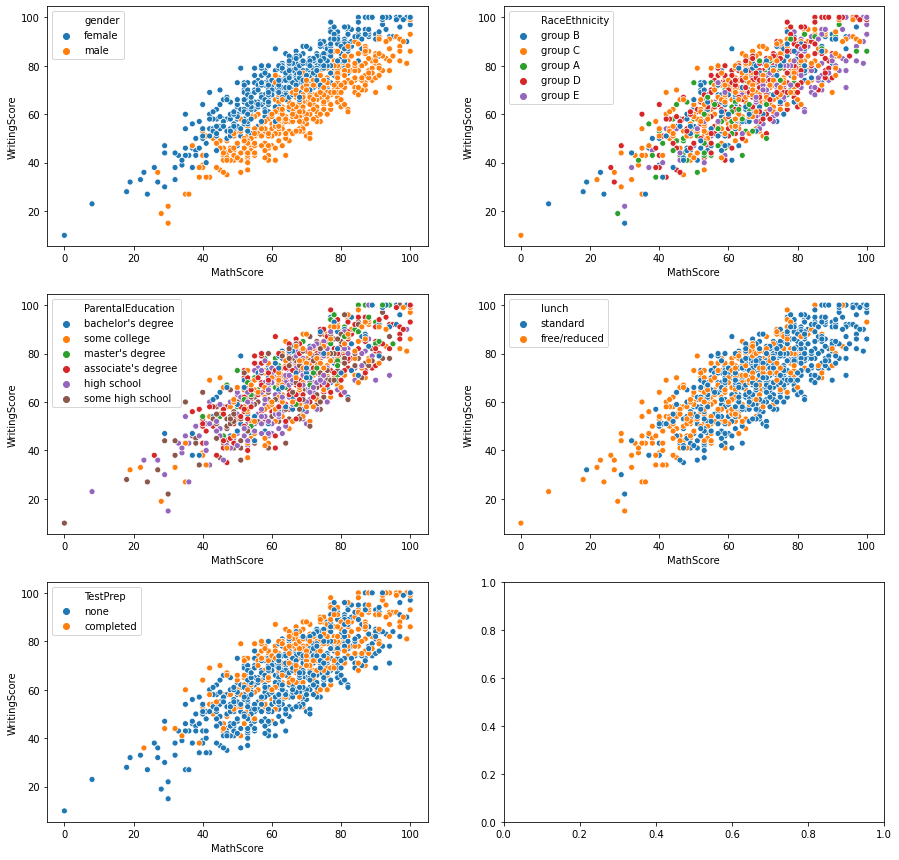

In [0]:
#Comparing MathScore and WritingScore on the basis of different paramerters
fig, axarr  = plt.subplots(3,2,figsize=(15,15))
sns.scatterplot(x='MathScore',y='WritingScore', hue='gender',data=sp,ax=axarr[0,0])
sns.scatterplot(x='MathScore',y='WritingScore', hue='RaceEthnicity',data=sp,ax=axarr[0,1])
sns.scatterplot(x='MathScore',y='WritingScore', hue='ParentalEducation',data=sp,ax=axarr[1,0])
sns.scatterplot(x='MathScore',y='WritingScore', hue='lunch',data=sp,ax=axarr[1,1])
sns.scatterplot(x='MathScore',y='WritingScore', hue='TestPrep',data=sp,ax=axarr[2,0])

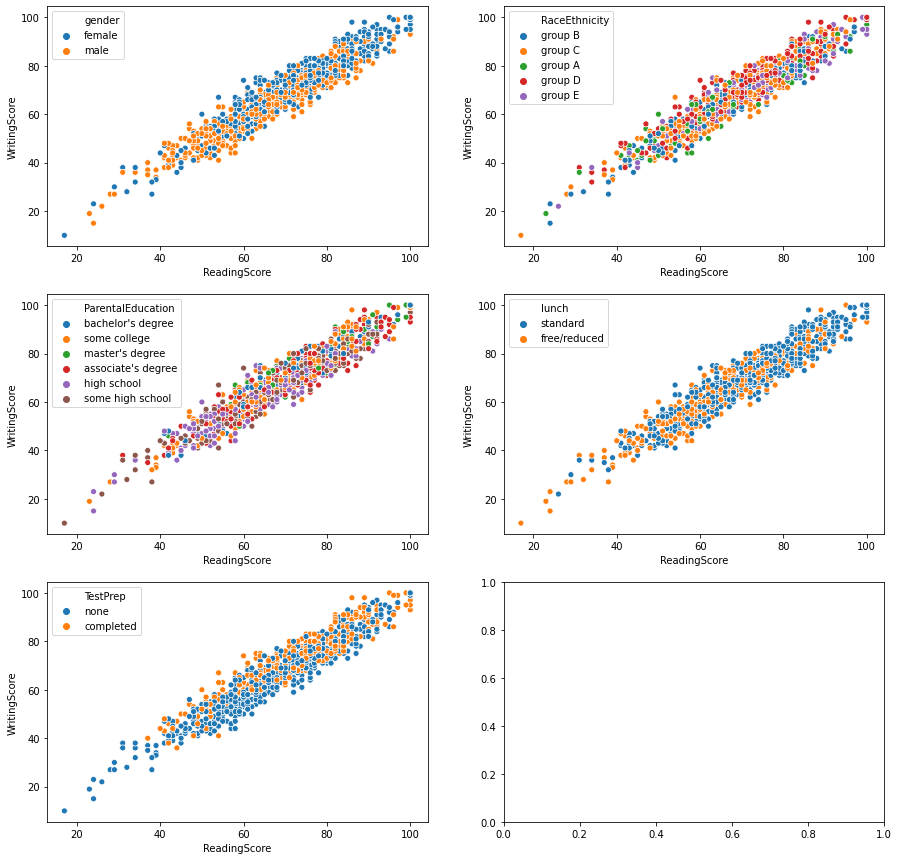

In [0]:
#Comparing ReadingScore and WritingScore on the basis of different paramerters
fig, axarr  = plt.subplots(3,2,figsize=(15,15))
sns.scatterplot(x='ReadingScore',y='WritingScore', hue='gender',data=sp,ax=axarr[0,0])
sns.scatterplot(x='ReadingScore',y='WritingScore', hue='RaceEthnicity',data=sp,ax=axarr[0,1])
sns.scatterplot(x='ReadingScore',y='WritingScore', hue='ParentalEducation',data=sp,ax=axarr[1,0])
sns.scatterplot(x='ReadingScore',y='WritingScore', hue='lunch',data=sp,ax=axarr[1,1])
sns.scatterplot(x='ReadingScore',y='WritingScore', hue='TestPrep',data=sp,ax=axarr[2,0])

In [0]:
#calulating average marks
sp['TotalMarks']=sp['MathScore']+sp['ReadingScore']+sp['WritingScore']
sp['AverageScore']=sp['TotalMarks']/3

In [0]:
#grading the students: the grading system is similar to the grading system of KIIT Deemed to be University
def GetGrade(AverageScore):
    if(AverageScore >= 90):
        return 'O'
    if(AverageScore >= 80):
        return 'E'
    if(AverageScore >= 70):
        return 'A'
    if(AverageScore >= 60):
        return 'B'
    if(AverageScore >= 50):
        return 'C'
    if(AverageScore >= 40):
        return 'D'  
    else:
        return 'F'

In [48]:
#counting the number of students in each grade and plotting the result
sp['Grade'] = sp.apply(lambda x: GetGrade(x['AverageScore']),axis =1)
sp.Grade.value_counts()

A    261
B    256
C    182
E    146
D     73
O     52
F     30
Name: Grade, dtype: int64

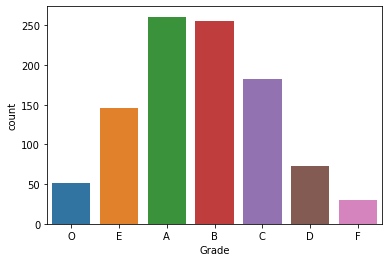

In [59]:
sns.countplot(x="Grade" , data=sp,order = ['O','E','A','B','C','D','F'])
# grade O,E is comsidered good performance
# grade A,B is considered average performance
# grade C,D is considered poor performance
# grade F is considered Failed

There are more average performers

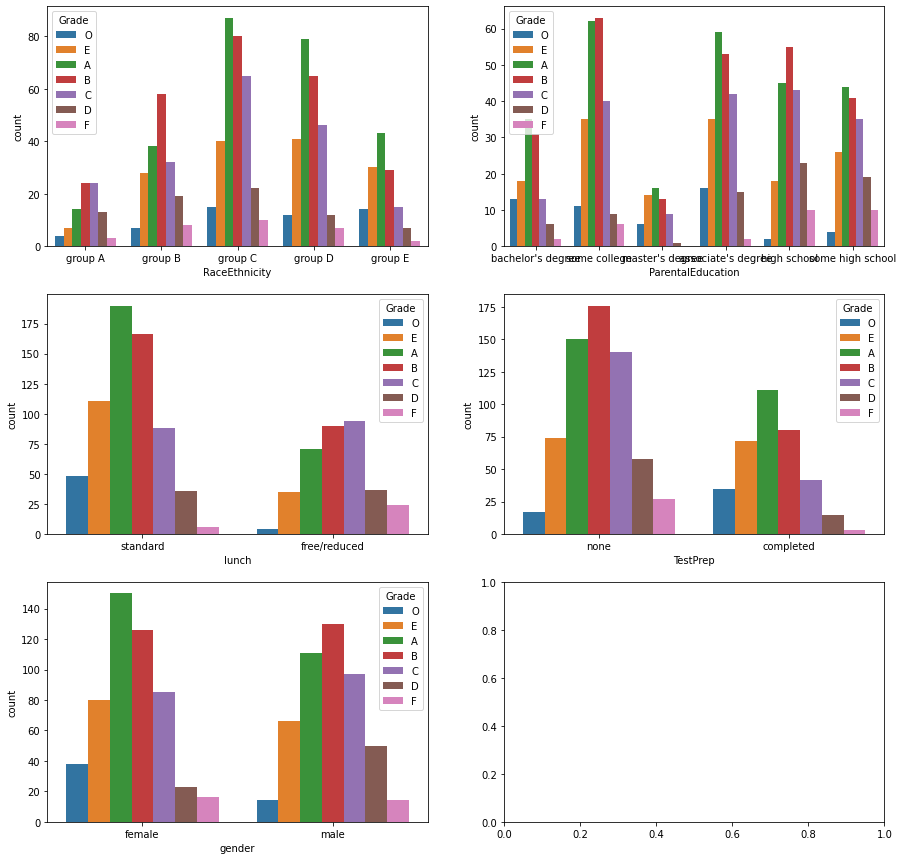

In [50]:
#analysing students on basis of grade 
fig, axarr  = plt.subplots(3,2,figsize=(15,15))
sns.countplot(x='RaceEthnicity',hue='Grade', data=sp, ax=axarr[0,0],order=['group A','group B','group C','group D','group E'],hue_order=['O','E','A','B','C','D','F'])
sns.countplot(x='ParentalEducation',hue='Grade', data=sp, ax=axarr[0,1],hue_order=['O','E','A','B','C','D','F'])
sns.countplot(x='lunch',hue='Grade', data=sp, ax=axarr[1,0],hue_order=['O','E','A','B','C','D','F'])
sns.countplot(x='TestPrep',hue='Grade', data=sp, ax=axarr[1,1],hue_order=['O','E','A','B','C','D','F'])
sns.countplot(x='gender',hue='Grade', data=sp, ax=axarr[2,0],hue_order=['O','E','A','B','C','D','F'])

1. Group C has the highest count of Good performers
2. Students whose parents background is Associate's Degree has the highest number of good performers
3. Students whose parents background is Some College has the highest number of average performers
4. Students whose parents background is High Schoole has the highest number of below average performers
5. Students who ate more have Secured better grades than those who did not
6. Students who did not take any test preparation course Secured Better Grades than those who took the course

We can Conclude that :
Female students of Group C whose parent's education background is Associate's Degree and had standard lunch had the Overall Best Scores without taking any test preparation course, thus making them the best Performers